In [3]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
import easyocr
from PIL import Image as PImage
from pathlib import Path

%matplotlib inline

In [6]:
def loadImages(path):
    # return array of images

    imagesList = os.listdir(path)
    image_names = []
    loadedImages = []
    for image in imagesList:
        img = PImage.open(path + image)
        loadedImages.append(np.array(img))
        image_names.append(image.split('.')[0])

    return loadedImages, image_names

path = "detecto/test/img/"

imgs, img_names = loadImages(path)

In [7]:
def filter_text(region, ocr_result, region_threshold):
    rectangle_size = region.shape[0] * region.shape[1]
    
    # выделяем номер отсекая слишком маленькие регионы по порогу
    plate = [] 
    for result in ocr_result:
        length = np.sum(np.subtract(result[0][1], result[0][0]))
        height = np.sum(np.subtract(result[0][2], result[0][1]))
        
        if length*height / rectangle_size > region_threshold:
            plate.append(result[1])
    return plate


def ocr_it(image, region_threshold):          
    reader = easyocr.Reader(['en'], gpu=True)
    ocr_result = reader.readtext(image)

    text = filter_text(image, ocr_result, region_threshold)

#     plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
#     plt.show()
#     print(text)
    return text

[([[31, 7], [290, 7], [290, 76], [31, 76]], 'AOOABP', 0.5137998503107547), ([[294, 50], [344, 50], [344, 74], [294, 74]], 'RUSE', 0.33366817235946655), ([[294, 6], [366, 6], [366, 62], [294, 62]], '54', 0.9998840138431118)] A001BP54
Wall time: 10.3 s


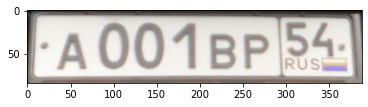

In [8]:
%%time
for img, img_name in zip(imgs, img_names):
    reader = easyocr.Reader(['en'])
    ocr_result = reader.readtext(img)
    print(ocr_result, img_name)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    break

In [9]:
%%time
region_threshold = 0.6
ocr_texts = []
for img, img_name in zip(imgs, img_names):
    text = ocr_it(img, region_threshold)
    ocr_texts.extend(text)

Wall time: 1h 14min 37s


In [10]:
len(img_names)

2845

In [11]:
len(ocr_texts)

2505

In [14]:
ocr_texts

['AOO Pcz1',
 'AOOZKX/52',
 'E002xc764',
 '002xy8?',
 'td',
 'FA004OEE3]',
 'A005AXE6',
 'AOO6AALO',
 'AOOZAE799',
 'FAOO7ctn63',
 'Aoo9xx 123',
 'A0n0wr',
 'FAOTIABE?',
 'AO11YBE2]',
 'A012AHZT',
 'A015yopz]',
 'A01QAX 22',
 'AOZOAAO6',
 '4020:072',
 'AO20KEn2z',
 'A020yk44',
 'AO2HP8Z',
 'A 021xH/86',
 'PAO25E673',
 "'40268792",
 'A 031EK15542',
 'AO32AX790]',
 'A033AAI8',
 "'A03500 199",
 'AO3ZXABS',
 '.041te24',
 'AOG2CERL',
 'AOGGCEJ196',
 'AO50AAZZ',
 "'A053 HPBL",
 'A053Xc37y',
 'AO58AE7',
 'FAO59EY/92]',
 '406IA092',
 'AO61MA',
 'Ade2c171',
 'A062ux71',
 'A063YE750',
 'AO69HO6Y',
 'AOZ1xon83',
 'AOZ4AYT4Z',
 'AO76AE',
 "'A078yo1z8",
 'AOBOAAP3',
 '"AO8OB0/197',
 'AO8OTA 792',
 'AO9OHB79?',
 'O9OXMEZ',
 'AO92EA125]',
 '40964477',
 'L0961c 159',
 '[AO97BK[122]',
 'A TOOOHI6_',
 'A1028Y51',
 'A104HcB?',
 'A1O4HXI',
 "'A 105x0l35]",
 '109T8/199',
 'ATTIHBIBZ',
 'Al14BIlz]',
 '(12047702',
 'Leors',
 '7AT949',
 'Iice9',
 'A132kh2T',
 'A1AXA',
 '140TBzs',
 "'A144Kol4t",
 'A147EclI',
 

In [44]:
img_names

['A001BP54',
 'A001PC71',
 'A002KX152',
 'A002XC763',
 'A002XY89',
 'A003CX196',
 'A004OE23',
 'A005AX26',
 'A006AA10',
 'A007AE799',
 'A007CH35',
 'A007CT163',
 'A009XX123',
 'A010TB34',
 'A011AB39',
 'A011YB42',
 'A012AA05',
 'A012AH716',
 'A015YO82',
 'A019AX122',
 'A020AA06',
 'A020AO198',
 'A020KE123',
 'A020YK134',
 'A021HP82',
 'A021XH86',
 'A025EE73',
 'A026EY92',
 'A031EK54',
 'A032AX790',
 'A033AA38',
 'A033TP33',
 'A035OO199_0',
 'A037XA35_0',
 'A041TE21',
 'A042CE174',
 'A044CE196',
 'A050AA77',
 'A053HP61',
 'A053XC37',
 'A058AE763',
 'A059EY92',
 'A061AO92',
 'A061MA10_0',
 'A062CT750',
 'A062TX716',
 'A063PO61',
 'A063YE750',
 'A064KY14',
 'A069HO51',
 'A071XO161',
 'A074AY147',
 'A076AE39',
 'A078AA10',
 'A078YO178',
 'A080AA93',
 'A080BO197_0',
 'A080TA197',
 'A090HB799',
 'A090XM44_0',
 'A092EA125',
 'A096AA77',
 'A096TC150',
 'A097BK122',
 'A100OH164',
 'A102BY51_0',
 'A104HC82',
 'A104HX01',
 'A105XO35_0',
 'A109TB199_0',
 'A111HB34',
 'A114BT92',
 'A120AY702',
 'A1

In [15]:
# Проверим, сколько номеров распозналось правильно

In [13]:
len(set([x.lower().replace(' ', '') for x in ocr_texts]) & set([x.lower() for x in img_names]))

111